In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data10.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data11.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data12.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data8.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data13.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data7.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data5.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data15.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data9.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data14.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data6.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data4.csv
/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data2.csv
/kaggle/input/power-system/binaryAllNaturalPl

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

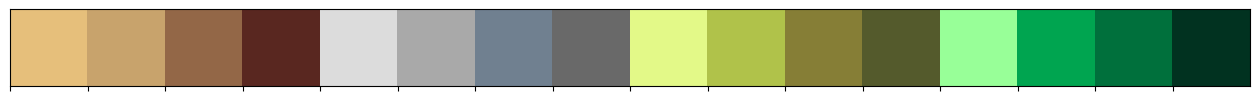

In [6]:
colors = [
    "#e6bf7b", "#c8a36c", "#936747", "#592720", "#dcdcdc", "#a9a9a9",
    "#708090", "#696969", "#e3f988", "#b0c24a", "#867e36", "#545a2c",
    "#98ff98", "#00a550", "#00703c", "#013220"
]
sns.palplot(sns.color_palette(colors))

In [7]:
df= pd.read_csv('/kaggle/input/power-system/binaryAllNaturalPlusNormalVsAttacks/data1.csv')

In [8]:
df.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,127798

In [25]:
inf_nan_cols = df.columns[df.isin([np.inf, -np.inf, np.nan]).any()]
df = df.drop(columns=inf_nan_cols)

In [26]:
np.isinf(df).sum()

R1-PA1:VH             0
R1-PM1:V              0
R1-PA2:VH             0
R1-PM2:V              0
R1-PA3:VH             0
R1-PM3:V              0
R1-PA4:IH             0
R1-PM4:I              0
R1-PA5:IH             0
R1-PM5:I              0
R1-PA6:IH             0
R1-PM6:I              0
R1-PA7:VH             0
R1-PM7:V              0
R1-PA8:VH             0
R1-PM8:V              0
R1-PA9:VH             0
R1-PM9:V              0
R1-PA10:IH            0
R1-PM10:I             0
R1-PA11:IH            0
R1-PM11:I             0
R1-PA12:IH            0
R1-PM12:I             0
R1:F                  0
R1:DF                 0
R1-PA:ZH              0
R1:S                  0
R2-PA1:VH             0
R2-PM1:V              0
R2-PA2:VH             0
R2-PM2:V              0
R2-PA3:VH             0
R2-PM3:V              0
R2-PA4:IH             0
R2-PM4:I              0
R2-PA5:IH             0
R2-PM5:I              0
R2-PA6:IH             0
R2-PM6:I              0
R2-PA7:VH             0
R2-PM7:V        

In [27]:
X = df.drop('marker',axis=1)
y = df['marker']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [28]:
df['marker'].value_counts()

marker
0    3866
1    1100
Name: count, dtype: int64

In [29]:
for col in df[['R1:S','R2:S','R3:S','R4:S']]:
    print(f"\033[031m\033[1m",col,":")
    print(f"\033[034m\033[1m",df[col].value_counts())
    print(f"\033[035m\033[1m","==="*10)

 R1:S :
 R1:S
0       4818
2048      99
2058      45
2056       4
Name: count, dtype: int64
 R2:S :
 R2:S
0    4966
Name: count, dtype: int64
 R3:S :
 R3:S
0       4925
2048      41
Name: count, dtype: int64
 R4:S :
 R4:S
0       4911
2048      29
2058      26
Name: count, dtype: int64


In [30]:
df.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,0.077897,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,0.027210,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,-3.136360,0,66.119330,127823.5305,-53.863762,127798.4572,-173.852584,127873.6770,-115.107221,487.43882,122.183250,502.08762,5.265482,484.32595,66.142248,127823.5305,0.0,0.0,0.0,0.0,-115

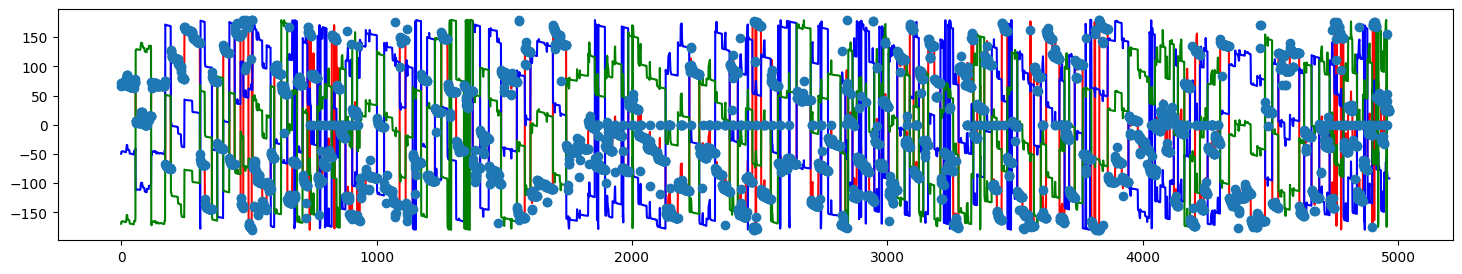

In [31]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(df["R1-PA1:VH"],'r')
ax = plt.plot(df["R1-PA2:VH"],'b')
ax = plt.plot(df["R1-PA3:VH"],'g')
ax = plt.plot(df["R1-PA4:IH"],'o');

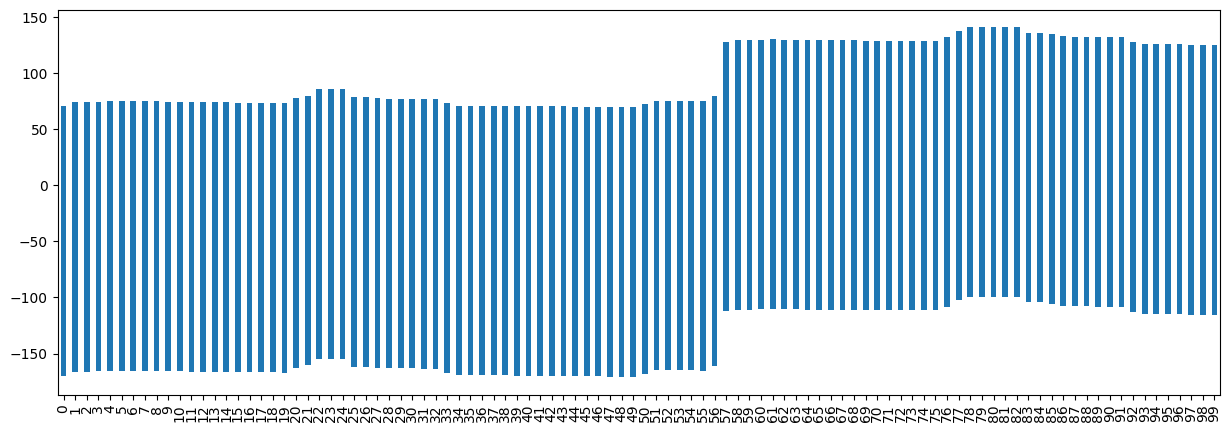

In [32]:
df["R1-PA1:VH"][:100].plot(kind="bar",figsize=(15,5))
df["R1-PA2:VH"][:100].plot(kind="bar",figsize=(15,5))
df["R1-PA3:VH"][:100].plot(kind="bar",figsize=(15,5))
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['marker'] = encoder.fit_transform(df['marker'])
df.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,0.077897,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,0.027210,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,-3.136360,0,66.119330,127823.5305,-53.863762,127798.4572,-173.852584,127873.6770,-115.107221,487.43882,122.183250,502.08762,5.265482,484.32595,66.142248,127823.5305,0.0,0.0,0.0,0.0,-115

In [34]:
X = df.drop('marker',axis=1)
y = df['marker']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train, y_train)
y_pred_ExtraTreesClassifier = ExtraTreesClassifier.predict(X_test)
acc_ExtraTreesClassifier = round(accuracy_score(y_test,y_pred_ExtraTreesClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(ExtraTreesClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_ExtraTreesClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_ExtraTreesClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_ExtraTreesClassifier))

 Train set score: 1.00
 Accuracy Score : 0.97
 Precision Score: 0.96
 Recall Score   : 0.90
 f1 Score       : 0.93 

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       770
           1       0.96      0.90      0.93       224

    accuracy                           0.97       994
   macro avg       0.96      0.95      0.95       994
weighted avg       0.97      0.97      0.97       994
 

 Confusion Matrix:
 [[761   9]
 [ 22 202]]


In [36]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
y_pred_XGBClassifier = XGBClassifier.predict(X_test)
acc_XGBClassifier = round(accuracy_score(y_test,y_pred_XGBClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(XGBClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_XGBClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_XGBClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_XGBClassifier))

 Train set score: 1.00
 Accuracy Score : 0.95
 Precision Score: 0.92
 Recall Score   : 0.87
 f1 Score       : 0.89 

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       770
           1       0.92      0.87      0.89       224

    accuracy                           0.95       994
   macro avg       0.94      0.92      0.93       994
weighted avg       0.95      0.95      0.95       994
 

 Confusion Matrix:
 [[753  17]
 [ 30 194]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(n_estimators=100)
RandomForestClassifier.fit(X_train, y_train)
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
acc_RandomForestClassifier = round(accuracy_score(y_test,y_pred_RandomForestClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(RandomForestClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_RandomForestClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_RandomForestClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_RandomForestClassifier))

 Train set score: 1.00
 Accuracy Score : 0.96
 Precision Score: 0.95
 Recall Score   : 0.88
 f1 Score       : 0.91 

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       770
           1       0.95      0.88      0.91       224

    accuracy                           0.96       994
   macro avg       0.96      0.93      0.95       994
weighted avg       0.96      0.96      0.96       994
 

 Confusion Matrix:
 [[759  11]
 [ 26 198]]


In [38]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred_BaggingClassifier = BaggingClassifier.predict(X_test)
acc_BaggingClassifier = round(accuracy_score(y_test,y_pred_BaggingClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(BaggingClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_BaggingClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_BaggingClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_BaggingClassifier))

 Train set score: 1.00
 Accuracy Score : 0.95
 Precision Score: 0.93
 Recall Score   : 0.84
 f1 Score       : 0.88 

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       770
           1       0.93      0.84      0.88       224

    accuracy                           0.95       994
   macro avg       0.94      0.91      0.93       994
weighted avg       0.95      0.95      0.95       994
 

 Confusion Matrix:
 [[755  15]
 [ 35 189]]


In [40]:
df.to_csv('/kaggle/working/data.csv', index=None)

In [43]:
import pickle

with open('/kaggle/working/ExtraTrees_model.pkl', 'wb') as file:
        pickle.dump(ExtraTreesClassifier, file)